In [2]:
import pandas as pd
filename = 'C:/Users/diaga/OneDrive/Documents/Springboard/Online Retail.xlsx'
data = pd.read_excel(filename)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#len(data[data.UnitPrice < 0 ])
len(data[data.CustomerID.isna()])
#data[data.CustomerID.isna()].groupby('Country').count()
#data[data.CustomerID.isna()].groupby(['Country','Description'])['InvoiceNo'].count().sort_values(ascending=False).head(60)

135080

In [5]:
len(data[data.UnitPrice < 0 ])
print(data[data.UnitPrice < 0 ])

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


In [6]:
len(data)

541909

In [7]:
data_clean = data[data['CustomerID'].notna()]
len(data_clean[data_clean.Quantity < 0 ])

8905

In [8]:
#data_clean = data_clean[data_clean['Quantity']]
len(data_clean)

406829

In [9]:
data_clean[['StockCode','Quantity','Country','UnitPrice']].nunique()

StockCode    3684
Quantity      436
Country        37
UnitPrice     620
dtype: int64

In [10]:
data_clean.groupby(['StockCode'])['UnitPrice'].nunique().sort_values(ascending=False).head()

StockCode
M       184
D        75
POST     71
DOT      16
CRUK     16
Name: UnitPrice, dtype: int64

In [69]:
test = data_clean.groupby(['StockCode'])['UnitPrice'].nunique()
test[test>1].count()

2642

In [ ]:
#import matplotlib.pyplot as plt
#_ = plt.hist(data_clean['UnitPrice'])
#plt.show()

In [11]:
from datetime import datetime
data_clean.loc[:,'Invoice_DAY'] = pd.to_datetime(data_clean.loc[:,'InvoiceDate']).dt.strftime('%m/%d/%Y').copy()
data_clean.loc[:,'InvoiceCost'] = data_clean.loc[:,'Quantity'] * data_clean.loc[:,'UnitPrice'].copy()
data_clean.head()

C:\Users\diaga\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\diaga\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_DAY,InvoiceCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12/01/2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,20.34


In [17]:
data_clean.loc[:,'Invoice_DAY'] = pd.to_datetime(data_clean.loc[:,'Invoice_DAY'])
data_clean.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Invoice_DAY    datetime64[ns]
InvoiceCost           float64
dtype: object

In [32]:
data_time = pd.DataFrame(data_clean.groupby('Invoice_DAY')['Quantity'].sum())
data_time['pandas_SMA_7'] = data_time.iloc[:,0].rolling(window=7).mean()
data_time['pandas_SMA_28'] = data_time.iloc[:,0].rolling(window=28).mean()
print(data_time.head(30))

             Quantity  pandas_SMA_7  pandas_SMA_28
Invoice_DAY                                       
2010-12-01      24032           NaN            NaN
2010-12-02      20855           NaN            NaN
2010-12-03      11548           NaN            NaN
2010-12-05      16394           NaN            NaN
2010-12-06      16095           NaN            NaN
2010-12-07      19351           NaN            NaN
2010-12-08      21275  18507.142857            NaN
2010-12-09      16904  17488.857143            NaN
2010-12-10      15388  16707.857143            NaN
2010-12-12      10561  16566.857143            NaN
2010-12-13      15234  16401.142857            NaN
2010-12-14      17108  16545.857143            NaN
2010-12-15      18169  16377.000000            NaN
2010-12-16      29482  17549.428571            NaN
2010-12-17      10517  16637.000000            NaN
2010-12-19       3735  14972.285714            NaN
2010-12-20      12617  15266.000000            NaN
2010-12-21      10888  14645.14

C:\Users\diaga\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


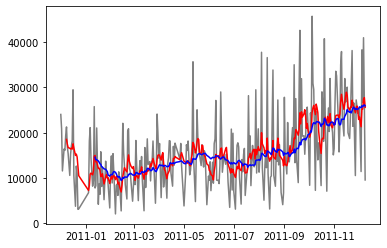

In [33]:
import matplotlib.pyplot as plt
plt.plot(data_time['Quantity'], color='grey')
plt.plot(data_time['pandas_SMA_7'], color='red')
plt.plot(data_time['pandas_SMA_28'], color='blue')

In [18]:
data_mean = data_clean.groupby('CustomerID').mean().drop('Quantity', axis = 1).rename(columns={'UnitPrice': 'UnitPrice_Mean', 'InvoiceCost': 'InvoiceCost_Mean'})
data_mean.head()

,UnitPrice_Mean,InvoiceCost_Mean
CustomerID,,
12346.0,1.040000,0.000000
12347.0,2.644011,23.681319
12348.0,5.764839,57.975484
12349.0,8.289041,24.076027
12350.0,3.841176,19.670588


In [14]:
data_count = data_clean.groupby('CustomerID').nunique().drop(['Description','Quantity','UnitPrice','CustomerID','InvoiceCost'], axis = 1)
data_count.columns = ['Txn_InvCt','StockCode_UniqueCt','Txn_DateCt','Country_Ct','Day_Ct']
print(data_count[data_count['Txn_InvCt'] != data_count['Txn_DateCt']])

            Txn_InvCt  StockCode_UniqueCt  Txn_DateCt  Country_Ct  Day_Ct
CustomerID                                                               
12415.0            26                 444          25           1      18
12424.0             2                  30           1           1       1
12457.0            12                  53          11           2       9
12494.0            13                  63          12           1      11
12569.0            35                  92          33           1      27
...               ...                 ...         ...         ...     ...
18065.0            15                 110          12           1       7
18102.0            62                 151          57           1      27
18168.0             9                 101           8           1       6
18172.0            25                 101          22           1      18
18177.0             7                  53           6           1       6

[152 rows x 5 columns]


In [15]:
data_sum = data_clean.groupby('CustomerID').sum().drop('UnitPrice',axis=1)
data_sum.columns = ['Total_Quantity','Total_Spend']
data_sum.head()

,Total_Quantity,Total_Spend
CustomerID,,
12346.0,0,0.00
12347.0,2458,4310.00
12348.0,2341,1797.24
12349.0,631,1757.55
12350.0,197,334.40


In [19]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_DAY,InvoiceCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [20]:
from datetime import timedelta
snapshotday = data_clean['Invoice_DAY'].max() + timedelta(days=1)
print(snapshotday)
data_clean = data_clean.sort_values(by='Invoice_DAY') 
print(data_clean)
    
#ifr(data_clean['Invoice_DAY'])

2011-12-10 00:00:00
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1320      536535     22943  CHRISTMAS LIGHTS 10 VINTAGE BAUBLES         3   
1319      536534     22112           CHOCOLATE HOT WATER BOTTLE         3   
1318      536534     22867              HAND WARMER BIRD DESIGN        12   
1317      536534     22865               HAND WARMER OWL DESIGN        12   
...          ...       ...                                  ...       ...   
541216    581494      POST                              POSTAGE         2   
541217    581495     23535              WALL ART BICYCLE SAFETY        12   
541218    581495     22699     ROSES REGENCY TEACUP AND SAUCER         12   
541211    581494     22554     PLASTERS IN TIN WOODLAND ANIMALS        12   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID      

In [21]:
dif_list = []
#print((data_clean['Invoice_DAY'][0] - data_clean['Invoice_DAY'][4000]).days)
def ifr(var):
    for i in range(1,len(var)):
        dif_list.append((var.iloc[i]-var.iloc[i-1]).days)
    IFR = np.mean(dif_list)
    return IFR

In [25]:
import numpy as np
data_IFR = data_clean.groupby("CustomerID")['Invoice_DAY'].agg(IFR= lambda x: ifr(x),
                                                 Recency=lambda y: snapshotday - y.max())
##for column in data_IFR:
##    data_IFR[column] = data_IFR[column].days
print(data_IFR.head())

                 IFR  Recency
CustomerID                   
12346.0     1.452662 326 days
12347.0     1.452789   3 days
12348.0     1.453086  76 days
12349.0     1.452956  19 days
12350.0     1.452928 311 days


In [40]:
#data_IFR['Recency'] = data_IFR['Recency'].dt.days.astype('int16')
print(data_IFR.describe())

               IFR      Recency
count  4372.000000  4372.000000
mean      1.453198    92.581199
std       0.005474   100.772139
min       1.442220     1.000000
25%       1.449231    17.000000
50%       1.453040    51.000000
75%       1.456863   144.000000
max       1.469208   374.000000


In [30]:
data_final = pd.merge(data_mean, data_count, on = 'CustomerID', how='outer')
data_final = pd.merge(data_final, data_sum, on = 'CustomerID', how='outer')
data_final = pd.merge(data_final, data_IFR, on = 'CustomerID', how='outer')
data_final.index = data_final.index.map(int)
data_final.head()

,UnitPrice_Mean,InvoiceCost_Mean,Txn_InvCt,StockCode_UniqueCt,Txn_DateCt,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,IFR,Recency
CustomerID,,,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00,1.452662,326
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00,1.452789,3
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24,1.453086,76
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55,1.452956,19
12350,3.841176,19.670588,1,17,1,1,1,197,334.40,1.452928,311


In [322]:
data_final.columns

Index(['UnitPrice_Mean', 'InvoiceCost_Mean', 'Txn_InvCt', 'StockCode_UniqueCt',
       'Txn_DateCt', 'Country_Ct', 'Day_Ct', 'Total_Quantity', 'Total_Spend',
       'IFR', 'Recency'],
      dtype='object')

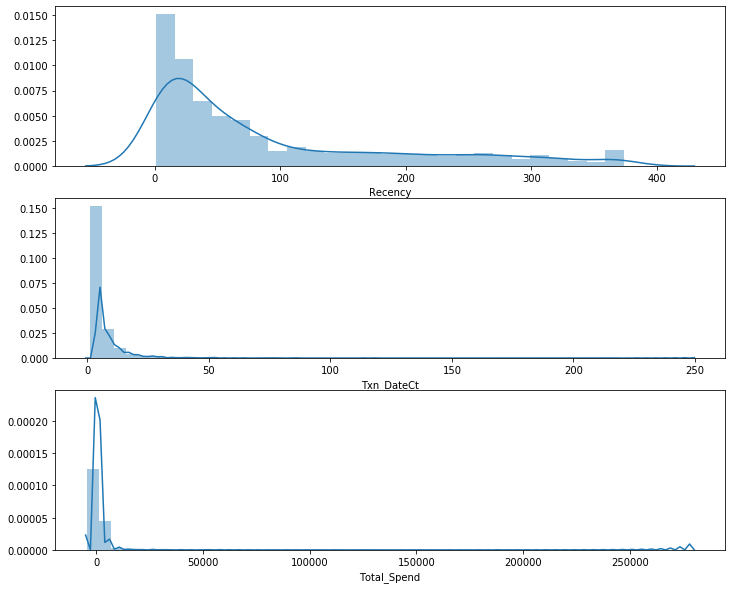

In [34]:
import seaborn as sns
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_final['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_final['Txn_DateCt'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_final['Total_Spend'])
# Show the plot
plt.show()

In [35]:
data_final[['Txn_DateCt','Recency','Total_Spend']].describe()

,Txn_DateCt,Recency,Total_Spend
count,4372.000000,4372.000000,4372.000000
mean,5.039799,92.581199,1898.459701
std,9.248607,100.772139,8219.345141
min,1.000000,1.000000,-4287.630000
25%,1.000000,17.000000,293.362500
50%,3.000000,51.000000,648.075000
75%,5.000000,144.000000,1611.725000
max,248.000000,374.000000,279489.020000


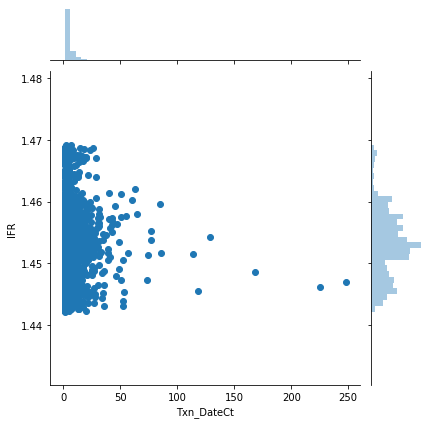

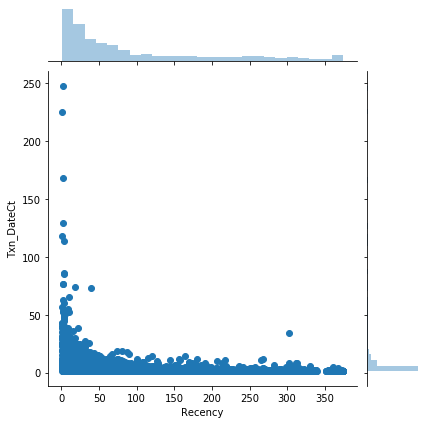

In [47]:
# Plot bivariate 
sns.jointplot('Txn_DateCt','IFR', data_final)
plt.show()
sns.jointplot('Recency','Txn_DateCt', data_final)
plt.show()

In [49]:
len(data_final[(data_final['Recency'] == 1) & (data_final['Txn_DateCt'] > 100)])
print(data_final[data_final['Txn_DateCt'] > 100])

            UnitPrice_Mean  InvoiceCost_Mean  Txn_InvCt  StockCode_UniqueCt  \
CustomerID                                                                    
12748             3.256269          6.262839        224                1769   
13089             2.782149         30.902466        118                 636   
14606             2.817764          4.210586        128                 832   
14911             5.261843         22.458516        248                1794   
15311             2.516158         23.853609        118                 571   
17841             2.547060          5.053336        169                1331   

            Txn_DateCt  Country_Ct  Day_Ct  Total_Quantity  Total_Spend  \
CustomerID                                                                
12748              225           1     115           24210     29072.10   
13089              114           1      83           30787     57385.88   
14606              129           1      89            5978     1171

In [63]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 4)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_final['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_final['Txn_DateCt'], q=3, labels=f_labels)
# Create new columns R and F 
data_final = data_final.assign(R = r_groups.values, F = f_groups.values)
data_final.head()

,UnitPrice_Mean,InvoiceCost_Mean,Txn_InvCt,StockCode_UniqueCt,Txn_DateCt,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,IFR,Recency,R,F
CustomerID,,,,,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00,1.452662,326,1,1
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00,1.452789,3,4,3
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24,1.453086,76,2,2
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55,1.452956,19,3,1
12350,3.841176,19.670588,1,17,1,1,1,197,334.40,1.452928,311,1,1


In [65]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_final['Total_Spend'], q=4, labels=m_labels)
# Create new column M
data_final = data_final.assign(M = m_groups.values)
data_final.head()

,UnitPrice_Mean,InvoiceCost_Mean,Txn_InvCt,StockCode_UniqueCt,Txn_DateCt,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,IFR,Recency,R,F,M
CustomerID,,,,,,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00,1.452662,326,1,1,1
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00,1.452789,3,4,3,4
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24,1.453086,76,2,2,4
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55,1.452956,19,3,1,4
12350,3.841176,19.670588,1,17,1,1,1,197,334.40,1.452928,311,1,1,2


In [66]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_final['RFM_Segment_Concat'] = data_final.apply(join_rfm, axis=1)
rfm = data_final
rfm.head()

,UnitPrice_Mean,InvoiceCost_Mean,Txn_InvCt,StockCode_UniqueCt,Txn_DateCt,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,IFR,Recency,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00,1.452662,326,1,1,1,111
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00,1.452789,3,4,3,4,434
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24,1.453086,76,2,2,4,224
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55,1.452956,19,3,1,4,314
12350,3.841176,19.670588,1,17,1,1,1,197,334.40,1.452928,311,1,1,2,112


In [67]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

48


In [68]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerID
12346     3.0
12347    11.0
12348     8.0
12349     8.0
12350     4.0
Name: RFM_Score, dtype: float64


In [69]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,UnitPrice_Mean,InvoiceCost_Mean,Txn_InvCt,StockCode_UniqueCt,Txn_DateCt,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,IFR,Recency,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00,1.452662,326,1,1,1,111,3.0,Require Activation
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00,1.452789,3,4,3,4,434,11.0,Can't Loose Them
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24,1.453086,76,2,2,4,224,8.0,Champions
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55,1.452956,19,3,1,4,314,8.0,Champions
12350,3.841176,19.670588,1,17,1,1,1,197,334.40,1.452928,311,1,1,2,112,4.0,Needs Attention


In [70]:
rfm.columns
rfm = rfm.iloc[:,7:]

Index(['UnitPrice_Mean', 'InvoiceCost_Mean', 'Txn_InvCt', 'StockCode_UniqueCt',
       'Txn_DateCt', 'Country_Ct', 'Day_Ct', 'Total_Quantity', 'Total_Spend',
       'IFR', 'Recency', 'R', 'F', 'M', 'RFM_Segment_Concat', 'RFM_Score',
       'RFM_Level'],
      dtype='object')

In [79]:
rfm = rfm.rename({'Total_Quantity': 'Frequency','Total_Spend':'MonetaryValue'}, axis=1)
print(rfm.head())

            Frequency  MonetaryValue       IFR  Recency  R  F  M  \
CustomerID                                                         
12346               0           0.00  1.452662      326  1  1  1   
12347            2458        4310.00  1.452789        3  4  3  4   
12348            2341        1797.24  1.453086       76  2  2  4   
12349             631        1757.55  1.452956       19  3  1  4   
12350             197         334.40  1.452928      311  1  1  2   

           RFM_Segment_Concat  RFM_Score           RFM_Level  
CustomerID                                                    
12346                     111        3.0  Require Activation  
12347                     434       11.0    Can't Loose Them  
12348                     224        8.0           Champions  
12349                     314        8.0           Champions  
12350                     112        4.0     Needs Attention  


In [80]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      21.0    2816.5        4826.8  1371
Champions             49.3     723.8        1230.3   414
Loyal                 60.4     569.9         924.0   427
Needs Attention      181.4     177.1         300.9   556
Potential             74.3     408.7         592.1   531
Promising            100.1     250.8         404.4   577
Require Activation   265.5      85.3         128.3   496


In [83]:
!pip install squarify
import squarify

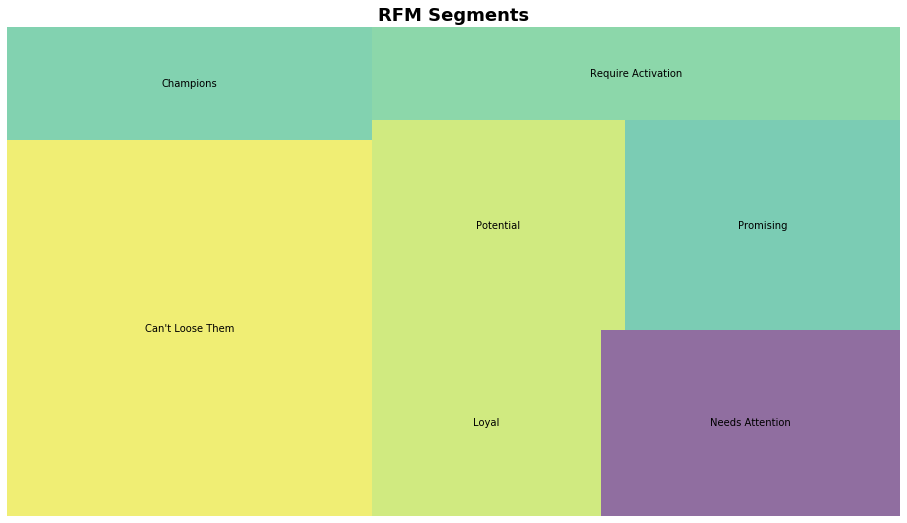

In [85]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()